In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [3]:
data.drop('ID#',axis=1,inplace=True)

In [4]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [5]:
from sklearn import preprocessing

In [6]:
norm = preprocessing.normalize(data)
norm

array([[9.70414393e-01, 0.00000000e+00, 3.44815547e-05, ...,
        0.00000000e+00, 2.41370883e-01, 0.00000000e+00],
       [9.40208573e-01, 0.00000000e+00, 4.88572320e-05, ...,
        0.00000000e+00, 3.40437193e-01, 0.00000000e+00],
       [9.81113099e-01, 0.00000000e+00, 2.37247449e-05, ...,
        0.00000000e+00, 1.66879855e-01, 0.00000000e+00],
       ...,
       [9.44947533e-01, 0.00000000e+00, 3.85184532e-05, ...,
        0.00000000e+00, 1.80009571e-02, 1.28394844e-05],
       [9.99591676e-01, 0.00000000e+00, 1.82078303e-05, ...,
        1.82078303e-05, 2.55091703e-02, 0.00000000e+00],
       [9.07271293e-01, 0.00000000e+00, 3.00819394e-04, ...,
        0.00000000e+00, 4.20545513e-01, 0.00000000e+00]])

In [7]:
norm_df=pd.DataFrame(norm,columns=data.columns)

In [8]:
from sklearn.cluster import KMeans

In [9]:
wcss=[]
for i in range(1,10):
    kmeans= KMeans(n_clusters=i,random_state=0).fit(norm_df)
    wcss.append(kmeans.inertia_)
    print(kmeans)
    print(kmeans.inertia_)
    print(kmeans.labels_)

KMeans(n_clusters=1, random_state=0)
484.85112913072544
[0 0 0 ... 0 0 0]
KMeans(n_clusters=2, random_state=0)
267.597410959919
[0 0 0 ... 0 0 0]
KMeans(n_clusters=3, random_state=0)
173.27025625511422
[1 1 1 ... 1 1 1]
KMeans(n_clusters=4, random_state=0)
116.32481600680403
[2 2 2 ... 0 2 2]
KMeans(n_clusters=5, random_state=0)
90.82698023976013
[1 3 1 ... 2 1 3]
KMeans(n_clusters=6, random_state=0)
70.47275559709189
[1 3 1 ... 2 1 3]
KMeans(n_clusters=7, random_state=0)
60.078332578744856
[0 3 0 ... 5 0 3]
KMeans(random_state=0)
51.934976526971916
[6 6 1 ... 4 1 6]
KMeans(n_clusters=9, random_state=0)
47.21689277668104
[5 5 0 ... 6 0 5]


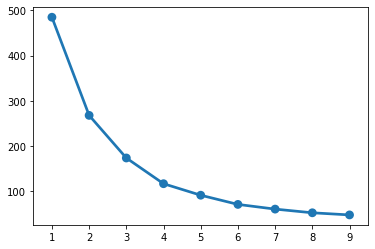

In [10]:
sns.pointplot(list(range(1,10)),wcss)
plt.show()

In [11]:
kmeans_model=KMeans(n_clusters=4,random_state=0).fit(norm_df)


In [12]:
norm_df1=norm_df.copy()

In [13]:
norm_df1['labels']=kmeans_model.labels_

In [14]:
norm_df1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,1
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,1
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,1
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,1
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,2


In [15]:
from sklearn.decomposition import PCA

In [16]:
pca= PCA(n_components=2,random_state=0)

In [17]:
pca_data=pca.fit_transform(norm_df)

In [18]:
pca_data

array([[-0.22439312,  0.13845142],
       [-0.19607902,  0.23416097],
       [-0.15916534,  0.03984526],
       ...,
       [ 0.04010548, -0.15029694],
       [-0.25556263, -0.06041197],
       [-0.18054572,  0.31941566]])

In [19]:
pca_df=pd.DataFrame(pca_data,columns=['pca1','pca2'])

In [20]:
pca_df.head()

,pca1,pca2
0,-0.224393,0.138451
1,-0.196079,0.234161
2,-0.159165,0.039845
3,-0.152854,0.314777
4,0.126842,-0.122741


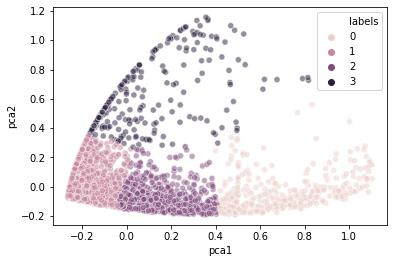

In [21]:
sns.scatterplot(x=pca_df['pca1'],y=pca_df['pca2'],hue=norm_df1['labels'],alpha=0.5)

# Hierarchical clustering

In [22]:
import scipy.cluster.hierarchy as shc

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Dendogram')
dend=shc.dendrogram(shc.linkage(norm_df,method='complete'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
cluster=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')

In [ ]:
cluster.fit_predict(norm_df)

In [ ]:
agc_labels=cluster.labels_

In [ ]:
# plt.figure(figsize=(10,7))  
sns.scatterplot(x=pca_df['pca1'],y=pca_df['pca2'],hue=agc_labels,alpha=0.5)

# DBSCAN Clustering

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan=DBSCAN(eps=0.03,min_samples=3).fit(norm_df)

In [ ]:
db_labels=dbscan.labels_
db_labels

In [ ]:
sns.scatterplot(x=pca_df['pca1'],y=pca_df['pca2'],hue=db_labels)